# LAVA* | Algorithmic Voyages Through the Afterlife's Maze
....

## How we find the 'ShortBest' path?
(list with the 4 algorithms)


### Our Hypothesis: A* finds always the 'ShortBest' path!

Let's see, if this is true ...

## Levels
As part of our exploration, we're committed to introducing and navigating through **various levels of complexity**. This initiative allows us to test and implement different search algorithms tailored to the evolving challenges presented by each level. This dynamic approach not only showcases the adaptability of our agent but also facilitates a comprehensive evaluation of its problem-solving capabilities across diverse scenarios.

### Building our Custom Environments

Our custom environments were developed using the **Minihack level editor** to gain precise control over our work. The environments we're working on are 15x15 **fully observable mazes**, where the agent navigates through the grid while avoiding hazardous **lava pools** and **ice spots**.

The agent always starts in the *top left corner* and needs to find the stairs in the *bottom right corner* while avoiding lava and ice pools.

Inside *env_levels.py* there are the different *'.des-file'*:

* Agent: '@'
* Target: '>'
* Floor tile: '.'
* Walls: '-' and '|'
* Lava pools: 'L'
* Ice spots: 'I'

For each Level, we: 
* initialize the specific map configuration
* set a random seed for reproducibility
* reset the environment to get the initial observation
* render the environment for visual representation

### A few words on the GridWorld Problem

To streamline the implementation of search algorithms in our agent, we've established a problem definition encapsulated within a class. Specifically, we've conceptualized our problem using a **GridWorldProblem class**. This class serves as a foundation for formulating the problem in a way that aligns with the principles of graph search algorithms.

In our case we will consider the _chars_ representation, a multi-dimensional array containing the ASCII encoding of the characters. More specifically:

* Agent: ASCII 64
* Stairs: ASCII 62
* Walls: ASCII
* Lava: ASCII 125

> To ensure an accurate and meaningful representation of the maze environment within the graph, we undertake a crucial **preprocessing step**. This step involves meticulous manipulation of the Minihack matrix, allowing us to narrow our focus exclusively to the observable aspects of the environment.

### Visualizing Paths with Plots

Since these search algorithms operate on graphs, we visualize the **corresponding graph of the agent's environment** each time. These graphs effectively represent the navigable nodes within the maze, with the coordinates of each node highlighted for clarity. 

* Red Nodes: Lava pools
* Grey Nodes: Ice spots
* Green Nodes: Nodes visited by the agent
* Blue Node: Initial position of the agent

In the first two levels, the edges connecting these states within the graph are uniformly assigned a cost of 1, while in the third level, the edges connecting to ice spots are assigned a cost of 3.

We generated visualizations for both uninformed and informed searches. 

For **uninformed searches**, only coordinates were displayed, while for **informed searches**, the cost corresponding to each node was included. This case is particularly interesting as it allows us to observe both the *explored nodes* and the *path* (depicted as green nodes).

In [1]:
#!pip install pandas

In [2]:
# Importations
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
import pandas as pd

from algorithms import *
from classes import *
from utils import *
from env_levels import *
from IPython.display import Image
import IPython.display as display


### Instantiate the variables for the comparison tables
.... (in order to collect the results we ....)

In [3]:
comparison_level1 = []
comparison_level2 = []
comparison_level3 = []
comparison_level4 = []
algorithms = ['Breadth First Search (UA)', 'Uniform Cost Search (UA)', 'A* (IA)', 'Greedy Best First Search (IA)']
time_level1 = []
path_level1 = []
path_cost_level1 = []
time_level2 = []
path_level2 = []
path_cost_level2 = []
time_level3 = []
path_level3 = []
path_cost_level3 = []
time_level4 = []
path_level4 = []
path_cost_level4 = []

# <u> LEVEL 1 </u>

In [4]:
# Creating the environment
env_lv1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv1,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv1.seed(42)
obs_lv1 = env_lv1.reset()
env_lv1.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}.........|                                                                 
|.....}.....}.|                                                                 
|}............|                                                                 
|.}.......}...|                                                                 
|...}}..}.....|                                                                 
|.}.........}.|                                                                 
|....}..}.....|                                                                 
|.}........}.}|            

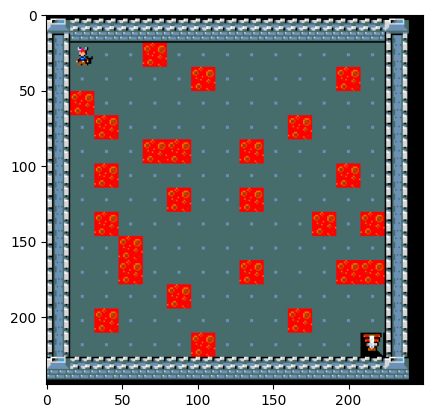

In [5]:
# Instantiate the game map
game = obs_lv1['pixel']

# Plotting the environment directly from minihack generator
plt.imshow(game[45:290, 0:250])

In [6]:
from comparison import *

grid_problem_lvl1 = generate_grid_problem(obs_lv1)
uninformed_agent_lvl1 = UninformedSearchAgent(grid_problem_lvl1)

perform_search(1, uninformed_agent_lvl1, breadth_first_search)
perform_search(1, uninformed_agent_lvl1, uniform_cost_search)

informed_agent_lvl1 = InformedSearchAgent(grid_problem_lvl1)
perform_search(1, informed_agent_lvl1, astar_search, euclidean_distance)
perform_search(1, informed_agent_lvl1, greedy_best_first_search, euclidean_distance)

df_lvl1 = generate_comparison_dataframe(1)
df_lvl1

Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.006880           29         29
Uniform Cost Search (UA)             0.012876           13         13
A* (IA)                              0.001940           13         13
Greedy Best First Search (IA)        0.000763           13         13

In [ ]:
"""
# Process character and color matrices from obs_lv1
game_map_lv1 = process_matrix(obs_lv1['chars'])
process_matrix(obs_lv1['colors']) # 6 is blue, 1 is red
game_map_lv1_colors = process_matrix(obs_lv1['colors'])

# Instantiate the GridWorldProblem
grid_problem1 = GridWorldProblem(game_map_lv1, find_state_coord(game_map_lv1, ord('@')), find_state_coord(game_map_lv1, ord('>')), game_map_lv1_colors)

#print("Initial state:", grid_problem1.initial_state)
#print("Goal state:", grid_problem1.goal_state)

# Create basic graph
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)

# Plot the basic graph
plot_graph(basic_graph, "plots/case1/case1.png")
"""

'\n# Process character and color matrices from obs_lv1\ngame_map_lv1 = process_matrix(obs_lv1[\'chars\'])\nprocess_matrix(obs_lv1[\'colors\']) # 6 is blue, 1 is red\ngame_map_lv1_colors = process_matrix(obs_lv1[\'colors\'])\n\n# Instantiate the GridWorldProblem\ngrid_problem1 = GridWorldProblem(game_map_lv1, find_state_coord(game_map_lv1, ord(\'@\')), find_state_coord(game_map_lv1, ord(\'>\')), game_map_lv1_colors)\n\n#print("Initial state:", grid_problem1.initial_state)\n#print("Goal state:", grid_problem1.goal_state)\n\n# Create basic graph\nbasic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)\n\n# Plot the basic graph\nplot_graph(basic_graph, "plots/case1/case1.png")\n'

## Uninformed Agent 

In [ ]:
"""
# Instantiate an Uninformed Search Agent for level 1
uninformed_agent = UninformedSearchAgent(grid_problem1) 
"""

'\n# Instantiate an Uninformed Search Agent for level 1\nuninformed_agent = UninformedSearchAgent(grid_problem1) \n'

### Breadth-First-Search

In [ ]:
"""
# Perform uniformed search with the Breadth-First Search
solution_path = uninformed_agent.search(breadth_first_search) 

# Record the execution time and the solution path (for the comparison)
time_level1.append(uninformed_agent.execution_time())
path_level1.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_level1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph(explored_graph, "plots/case1/breadth_first_search.png")
""" 

'\n# Perform uniformed search with the Breadth-First Search\nsolution_path = uninformed_agent.search(breadth_first_search) \n\n# Record the execution time and the solution path (for the comparison)\ntime_level1.append(uninformed_agent.execution_time())\npath_level1.append(len(solution_path))\n\nprint(f\'Time: {uninformed_agent.execution_time()} seconds\')\nprint(f\'The found path is long {len(solution_path)}.\')\n\n# Cost path computation\npath_cost_level1.append(len(solution_path)*1)\nprint(f\'The cost of the taken path is {len(solution_path)*1}.\')\n\n# Highlight the explored nodes in green\nbasic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)\nexplored_graph = highlight_explored_nodes(basic_graph, solution_path)\n\n# Plot the graph with both basic and explored nodes\nplot_graph(explored_graph, "plots/case1/breadth_first_search.png")\n'

### Uniform Cost Search
Now we are changing the algorithm. We are using the Uniform Cost Search, which takes the g(n) cost into account. The g(n) is the cost from the initial state to the current node n.

In [ ]:
"""
# Use the Uniform Cost Search
uninformed_agent = UninformedSearchAgent(grid_problem1)
solution_path, node_distances = uninformed_agent.search(uniform_cost_search)

# Record the results
time_level1.append(uninformed_agent.execution_time())
path_level1.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The taken path has the length {len(solution_path)} (steps).')

# Cost path computation
path_cost_level1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case1/uniform_cost.png")
"""

'\n# Use the Uniform Cost Search\nuninformed_agent = UninformedSearchAgent(grid_problem1)\nsolution_path, node_distances = uninformed_agent.search(uniform_cost_search)\n\n# Record the results\ntime_level1.append(uninformed_agent.execution_time())\npath_level1.append(len(solution_path))\n\nprint(f\'Time: {uninformed_agent.execution_time()} seconds\')\nprint(f\'The taken path has the length {len(solution_path)} (steps).\')\n\n# Cost path computation\npath_cost_level1.append(len(solution_path)*1)\nprint(f\'The cost of the taken path is {len(solution_path)*1}.\')\n\n# Highlight the explored nodes in green\nbasic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)\nexplored_graph = highlight_explored_nodes(basic_graph, solution_path)\n\n# Plot the graph with both basic and explored nodes\nplot_graph_distances(explored_graph, node_distances, "plots/case1/uniform_cost.png")\n'

## Informed Agent 

In [ ]:
"""
# Instantiate an Informed Search Agent
informed_agent = InformedSearchAgent(grid_problem1)
"""

'\n# Instantiate an Informed Search Agent\ninformed_agent = InformedSearchAgent(grid_problem1)\n'

### A*

In [ ]:
"""
# Use A* 
solution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)

# Record the results
time_level1.append(informed_agent.execution_time())
path_level1.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case1/astar_search.png")
"""

'\n# Use A* \nsolution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)\n\n# Record the results\ntime_level1.append(informed_agent.execution_time())\npath_level1.append(len(solution_path))\n\nprint(f\'Time: {informed_agent.execution_time()} seconds\')\nprint(f"The found path is long {len(solution_path)}")\n\n# Cost path computation\npath_cost_level1.append(len(solution_path)*1)\nprint(f\'The cost of the taken path is {len(solution_path)*1}.\')\n\n# Highlight the explored nodes in green\nbasic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)\nexplored_graph = highlight_explored_nodes(basic_graph, solution_path)\n\n# Plot the graph with both basic and explored nodes\nplot_graph_distances(explored_graph, node_distances, "plots/case1/astar_search.png")\n'

### Greedy Best First Search

In [ ]:
"""
# Use Greedy Best First Search
informed_agent = InformedSearchAgent(grid_problem1)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)

# Record the results
time_level1.append(informed_agent.execution_time())
path_level1.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case1/greedy_best_first_search.png")
"""

'\n# Use Greedy Best First Search\ninformed_agent = InformedSearchAgent(grid_problem1)\nsolution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)\n\n# Record the results\ntime_level1.append(informed_agent.execution_time())\npath_level1.append(len(solution_path))\n\nprint(f\'Time: {informed_agent.execution_time()} seconds\')\nprint(f"The found path is long {len(solution_path)}")\n\n# Cost path computation\npath_cost_level1.append(len(solution_path)*1)\nprint(f\'The cost of the taken path is {len(solution_path)*1}.\')\n\n# Highlight the explored nodes in green\nbasic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)\nexplored_graph = highlight_explored_nodes(basic_graph, solution_path)\n\n# Plot the graph with both basic and explored nodes\nplot_graph_distances(explored_graph, node_distances, "plots/case1/greedy_best_first_search.png")\n'

In [ ]:
"""
###### put it somewhere else to show somethinh
# PLOT
actions = actions_from_path(find_state_coord(game_map_lv1, ord('@')), solution_path)

# Create a new figure without plotting anything
plt.figure(figsize=(6, 6))
plt.axis('off')  # Turn off axis ticks and labels
plt.title('Demo Rendering')

image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env_lv1.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])
    time.sleep(0.3)
"""

"\n###### put it somewhere else to show somethinh\n# PLOT\nactions = actions_from_path(find_state_coord(game_map_lv1, ord('@')), solution_path)\n\n# Create a new figure without plotting anything\nplt.figure(figsize=(6, 6))\nplt.axis('off')  # Turn off axis ticks and labels\nplt.title('Demo Rendering')\n\nimage = plt.imshow(game[25:300, :475])\nfor action in actions:\n    s, _, _, _ = env_lv1.step(action)\n    display.display(plt.gcf())\n    display.clear_output(wait=True)\n    image.set_data(s['pixel'][25:300, :475])\n    time.sleep(0.3)\n"

## LEVEL 1: Performance Evaluation and Comparison of Search Algorithms
...... (short explanation)

In [ ]:
"""
comparison_level1.append(algorithms)
comparison_level1.append(time_level1)
comparison_level1.append(path_level1)
comparison_level1.append(path_cost_level1)
df_level1 = pd.DataFrame()
df_level1['Algorithm'] = algorithms
df_level1['Execution Time'] = time_level1
df_level1['Path Length'] = path_level1
df_level1['Path Cost'] = path_cost_level1
df_level1.set_index('Algorithm', inplace=True)
df_level1
"""

"\ncomparison_level1.append(algorithms)\ncomparison_level1.append(time_level1)\ncomparison_level1.append(path_level1)\ncomparison_level1.append(path_cost_level1)\ndf_level1 = pd.DataFrame()\ndf_level1['Algorithm'] = algorithms\ndf_level1['Execution Time'] = time_level1\ndf_level1['Path Length'] = path_level1\ndf_level1['Path Cost'] = path_cost_level1\ndf_level1.set_index('Algorithm', inplace=True)\ndf_level1\n"

In [ ]:
#Image(filename='plots/case1/case1.png', width=500, height=500)

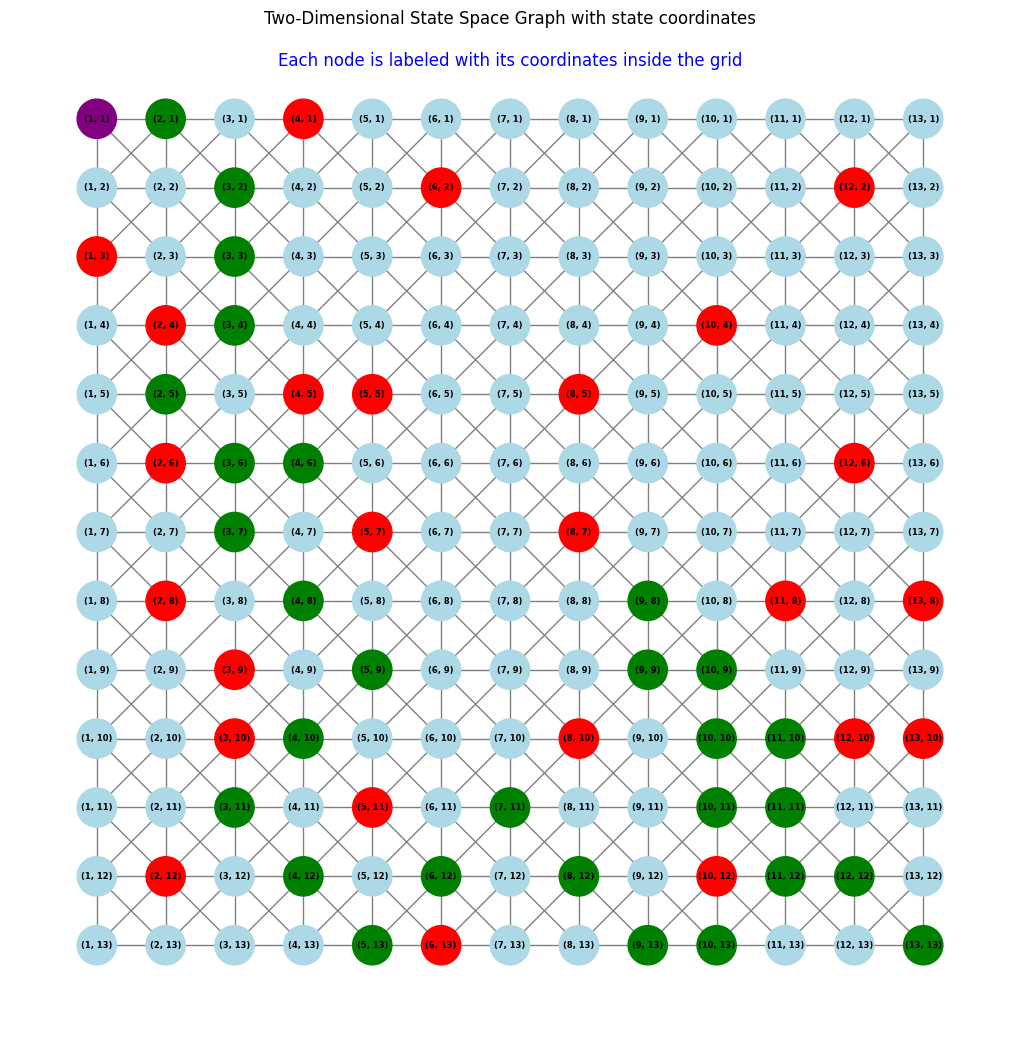

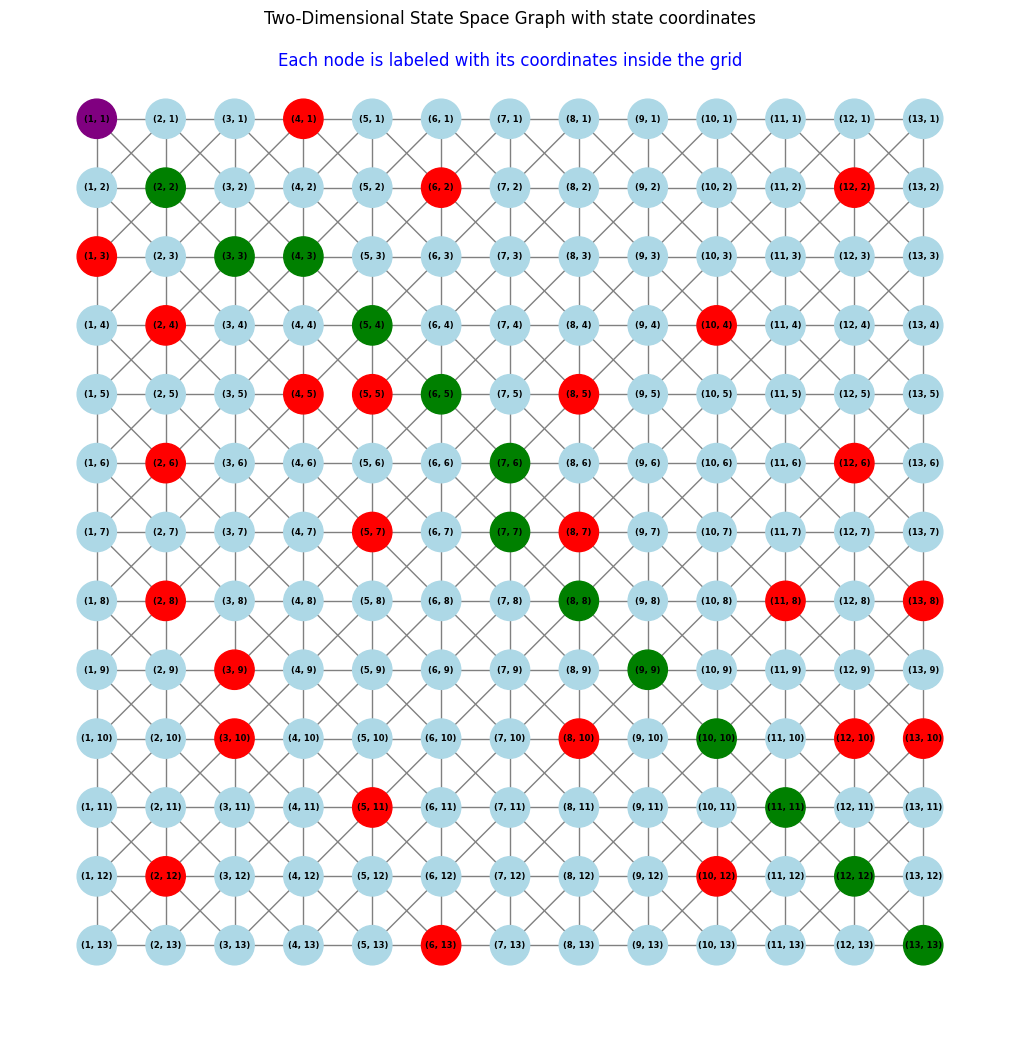

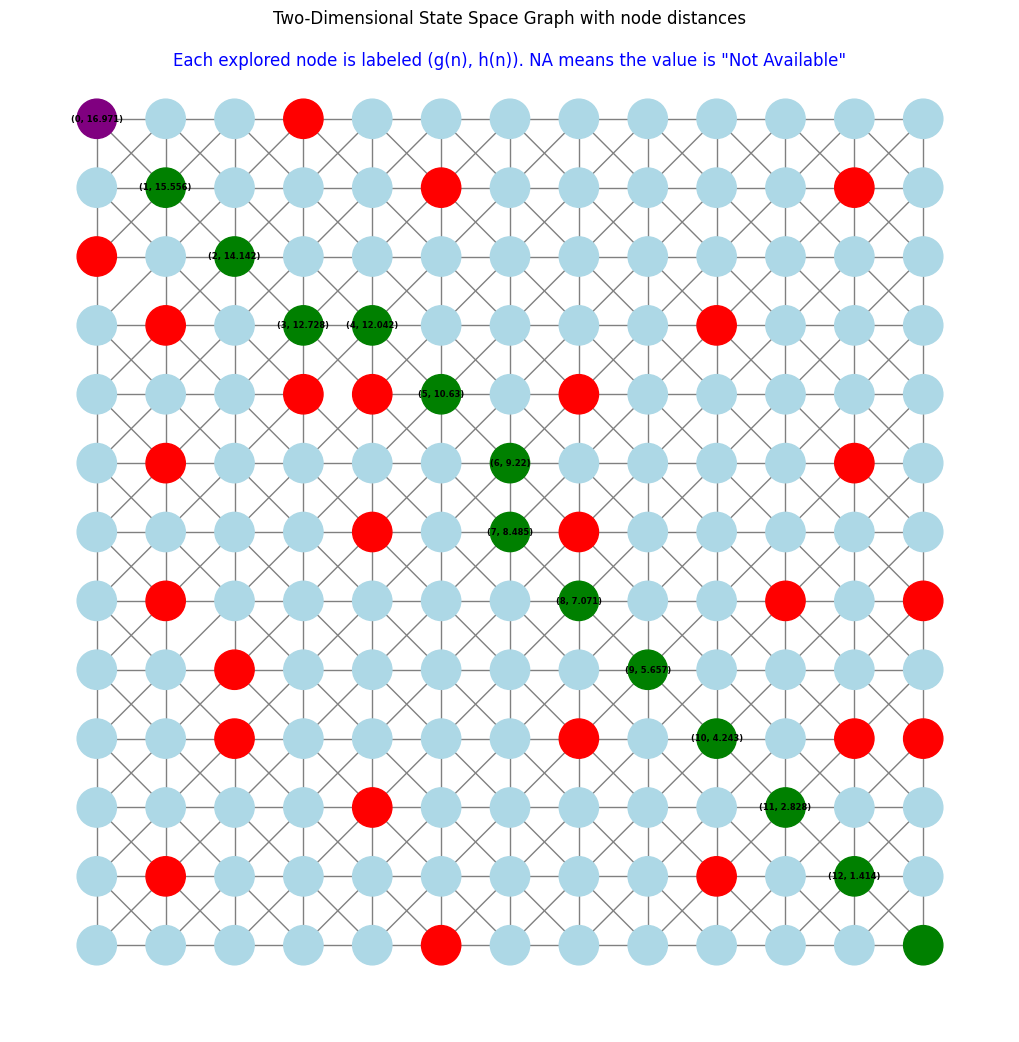

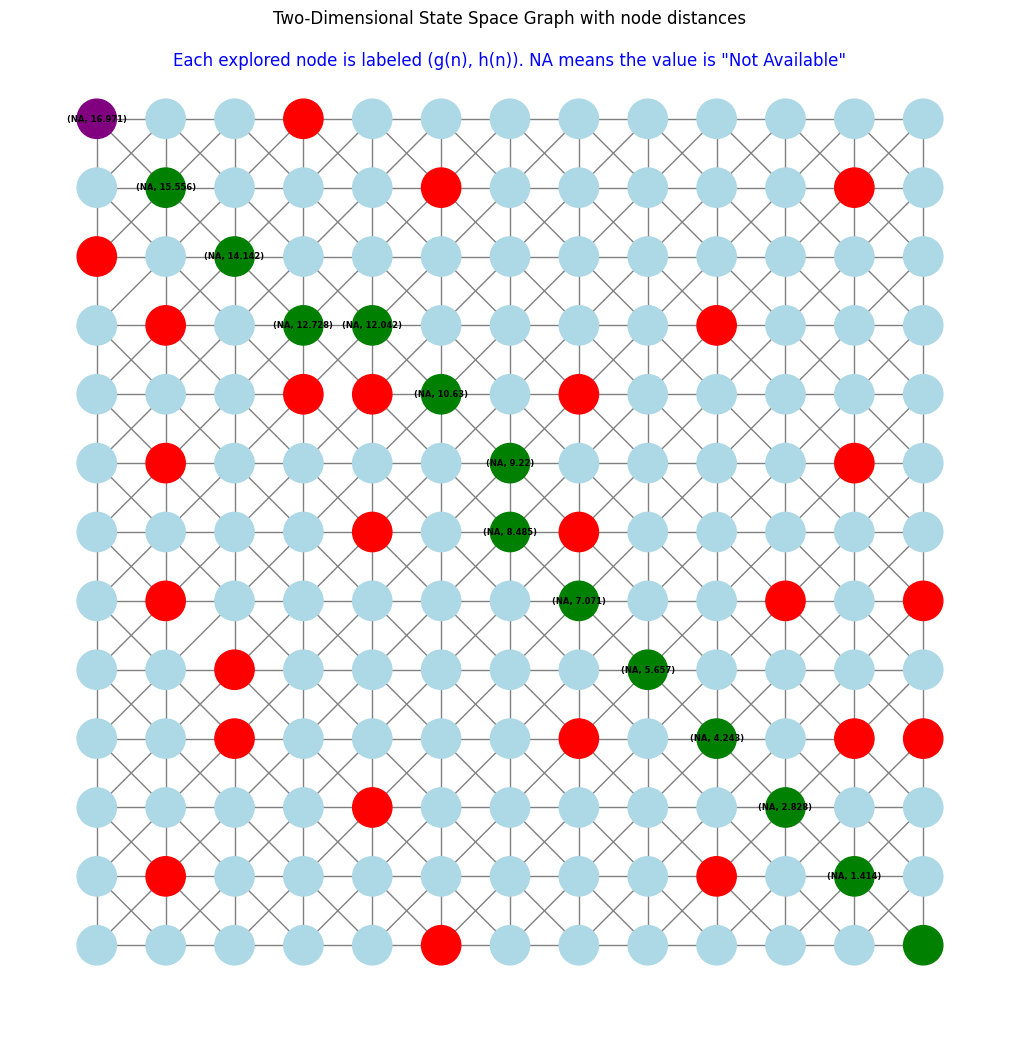

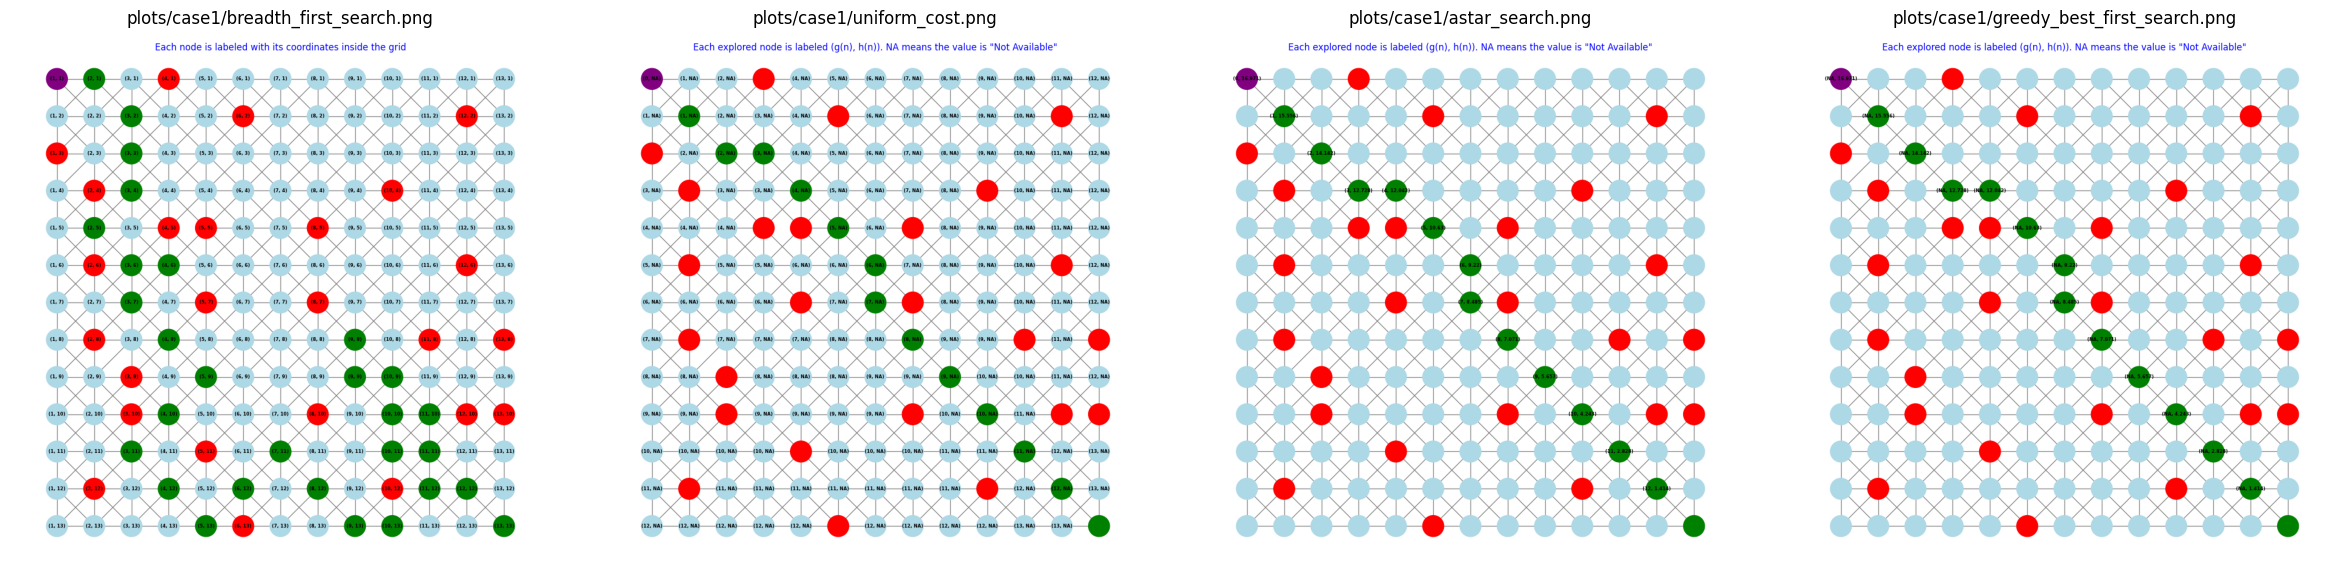

In [ ]:
%matplotlib inline
plot_paths_level1 = ['plots/case1/breadth_first_search.png',
                    'plots/case1/uniform_cost.png',
                    'plots/case1/astar_search.png',
                    'plots/case1/greedy_best_first_search.png']

display_saved_plots(plot_paths_level1)

### Results and Findings
....

## <u> LEVEL 2 </u>
To increase the complexity of the environment and to test, how the algorithms work, we add more lava pools.

In [ ]:
# Creating the environment
env_lv2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv2,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv2.seed(42)
obs_lv2 = env_lv2.reset() 
env_lv2.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}........}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

In [ ]:
"""
game_map_lv2 = process_matrix(obs_lv2['chars'])
game_map_lv2_colors = process_matrix(obs_lv2['colors'])
plt.imshow(obs_lv2['pixel'][45:290, 0:250])
"""

"\ngame_map_lv2 = process_matrix(obs_lv2['chars'])\ngame_map_lv2_colors = process_matrix(obs_lv2['colors'])\nplt.imshow(obs_lv2['pixel'][45:290, 0:250])\n"

In [ ]:
grid_problem_lvl2 = generate_grid_problem(obs_lv2)
uninformed_agent_lvl2 = UninformedSearchAgent(grid_problem_lvl2)

perform_search(2, uninformed_agent_lvl2, breadth_first_search)
perform_search(2, uninformed_agent_lvl2, uniform_cost_search)

informed_agent_lvl2 = InformedSearchAgent(grid_problem_lvl2)
perform_search(2, informed_agent_lvl2, astar_search, euclidean_distance)
perform_search(2, informed_agent_lvl2, greedy_best_first_search, euclidean_distance)

df_lvl2 = generate_comparison_dataframe(2)
df_lvl2

Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.009349           28         28
Uniform Cost Search (UA)             0.021619           14         14
A* (IA)                              0.010321           14         14
Greedy Best First Search (IA)        0.002024           14         14

In [ ]:
"""
# Instantiate GridWorldProblem for new environment
grid_problem2 = GridWorldProblem(game_map_lv2, find_state_coord(game_map_lv2, ord('@')), find_state_coord(game_map_lv2, ord('>')), game_map_lv2_colors)

print("Initial state:", grid_problem2.initial_state)
print("Goal state:", grid_problem2.goal_state)

basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)

plot_graph(basic_graph, "plots/case2/case2.png")
"""

'\n# Instantiate GridWorldProblem for new environment\ngrid_problem2 = GridWorldProblem(game_map_lv2, find_state_coord(game_map_lv2, ord(\'@\')), find_state_coord(game_map_lv2, ord(\'>\')), game_map_lv2_colors)\n\nprint("Initial state:", grid_problem2.initial_state)\nprint("Goal state:", grid_problem2.goal_state)\n\nbasic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)\n\nplot_graph(basic_graph, "plots/case2/case2.png")\n'

## Uninformed Agent 

In [ ]:
"""
# Instantiate an Uninformed Search Agent for level 2
uninformed_agent = UninformedSearchAgent(grid_problem2)
"""

'\n# Instantiate an Uninformed Search Agent for level 2\nuninformed_agent = UninformedSearchAgent(grid_problem2)\n'

### Breadth-First-Search

In [ ]:
"""
# Perform uniformed search with the Breadth-First Search
solution_path = uninformed_agent.search(breadth_first_search)

# Record the results
time_level2.append(uninformed_agent.execution_time())
path_level2.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_level2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph 
plot_graph(explored_graph, "plots/case2/breadth_first_search.png") # Plot the graph with both basic and explored nodes
"""

'\n# Perform uniformed search with the Breadth-First Search\nsolution_path = uninformed_agent.search(breadth_first_search)\n\n# Record the results\ntime_level2.append(uninformed_agent.execution_time())\npath_level2.append(len(solution_path))\n\nprint(f\'Time: {uninformed_agent.execution_time()} seconds\')\nprint(f\'The found path is long {len(solution_path)}.\')\n\n# Cost path computation\npath_cost_level2.append(len(solution_path)*1)\nprint(f\'The cost of the taken path is {len(solution_path)*1}.\')\n\n# Highlight the explored nodes\nbasic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)\nexplored_graph = highlight_explored_nodes(basic_graph, solution_path)\n\n# Plot the graph \nplot_graph(explored_graph, "plots/case2/breadth_first_search.png") # Plot the graph with both basic and explored nodes\n'

### Uniform Cost Search

In [ ]:
"""
# Use the Uniform Cost Search
solution_path, node_distances = uninformed_agent.search(uniform_cost_search)

# Record the results
time_level2.append(uninformed_agent.execution_time())
path_level2.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_level2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph 
plot_graph_distances(explored_graph, node_distances, "plots/case2/uniform_cost.png")
"""

'\n# Use the Uniform Cost Search\nsolution_path, node_distances = uninformed_agent.search(uniform_cost_search)\n\n# Record the results\ntime_level2.append(uninformed_agent.execution_time())\npath_level2.append(len(solution_path))\n\nprint(f\'Time: {uninformed_agent.execution_time()} seconds\')\nprint(f\'The found path is long {len(solution_path)}.\')\n\n# Cost path computation\npath_cost_level2.append(len(solution_path)*1)\nprint(f\'The cost of the taken path is {len(solution_path)*1}.\')\n\n# Highlight the explored nodes\nbasic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)\nexplored_graph = highlight_explored_nodes(basic_graph, solution_path)\n\n# Plot the graph \nplot_graph_distances(explored_graph, node_distances, "plots/case2/uniform_cost.png")\n'

## Informed Agent

In [ ]:
"""
# Instantiate an Informed Search Agent
informed_agent = InformedSearchAgent(grid_problem2)
"""

'\n# Instantiate an Informed Search Agent\ninformed_agent = InformedSearchAgent(grid_problem2)\n'

### A*

In [ ]:
"""
# Use A* 
solution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)

# Record the results
time_level2.append(informed_agent.execution_time())
path_level2.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph
plot_graph_distances(explored_graph, node_distances, "plots/case2/astar_search.png")
"""

'\n# Use A* \nsolution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)\n\n# Record the results\ntime_level2.append(informed_agent.execution_time())\npath_level2.append(len(solution_path))\n\nprint(f\'Time: {informed_agent.execution_time()} seconds\')\nprint(f"The found path is long {len(solution_path)}")\n\n# Cost path computation\npath_cost_level2.append(len(solution_path)*1)\nprint(f\'The cost of the taken path is {len(solution_path)*1}.\')\n\n# Highlight the explored nodes\nbasic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)\nexplored_graph = highlight_explored_nodes(basic_graph, solution_path)\n\n# Plot the graph\nplot_graph_distances(explored_graph, node_distances, "plots/case2/astar_search.png")\n'

### Greedy Best-First Search

In [ ]:
"""
# Use Greedy Best First Search
informed_agent = InformedSearchAgent(grid_problem2)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)

# Record the results
time_level2.append(informed_agent.execution_time())
path_level2.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case2/greedy_best_first_search.png")
"""

'\n# Use Greedy Best First Search\ninformed_agent = InformedSearchAgent(grid_problem2)\nsolution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)\n\n# Record the results\ntime_level2.append(informed_agent.execution_time())\npath_level2.append(len(solution_path))\n\nprint(f\'Time: {informed_agent.execution_time()} seconds\')\nprint(f"The found path is long {len(solution_path)}")\n\n# Cost path computation\npath_cost_level2.append(len(solution_path)*1)\nprint(f\'The cost of the taken path is {len(solution_path)*1}.\')\n\n# Highlight the explored nodes in green\nbasic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)\nexplored_graph = highlight_explored_nodes(basic_graph, solution_path)\n\n# Plot the graph with both basic and explored nodes\nplot_graph_distances(explored_graph, node_distances, "plots/case2/greedy_best_first_search.png")\n'

In [ ]:
"""
comparison_level2.append(algorithms)
comparison_level2.append(time_level2)
comparison_level2.append(path_level2)
comparison_level2.append(path_cost_level2)
df_level2 = pd.DataFrame()
df_level2['Algorithm'] = algorithms
df_level2['Execution Time'] = time_level2
df_level2['Path Length'] = path_level2
df_level2['Path Cost'] = path_cost_level2
df_level2.set_index('Algorithm', inplace=True)
df_level2
"""

"\ncomparison_level2.append(algorithms)\ncomparison_level2.append(time_level2)\ncomparison_level2.append(path_level2)\ncomparison_level2.append(path_cost_level2)\ndf_level2 = pd.DataFrame()\ndf_level2['Algorithm'] = algorithms\ndf_level2['Execution Time'] = time_level2\ndf_level2['Path Length'] = path_level2\ndf_level2['Path Cost'] = path_cost_level2\ndf_level2.set_index('Algorithm', inplace=True)\ndf_level2\n"

In [ ]:
#Image(filename='plots/case2/case2.png', width=500, height=500)

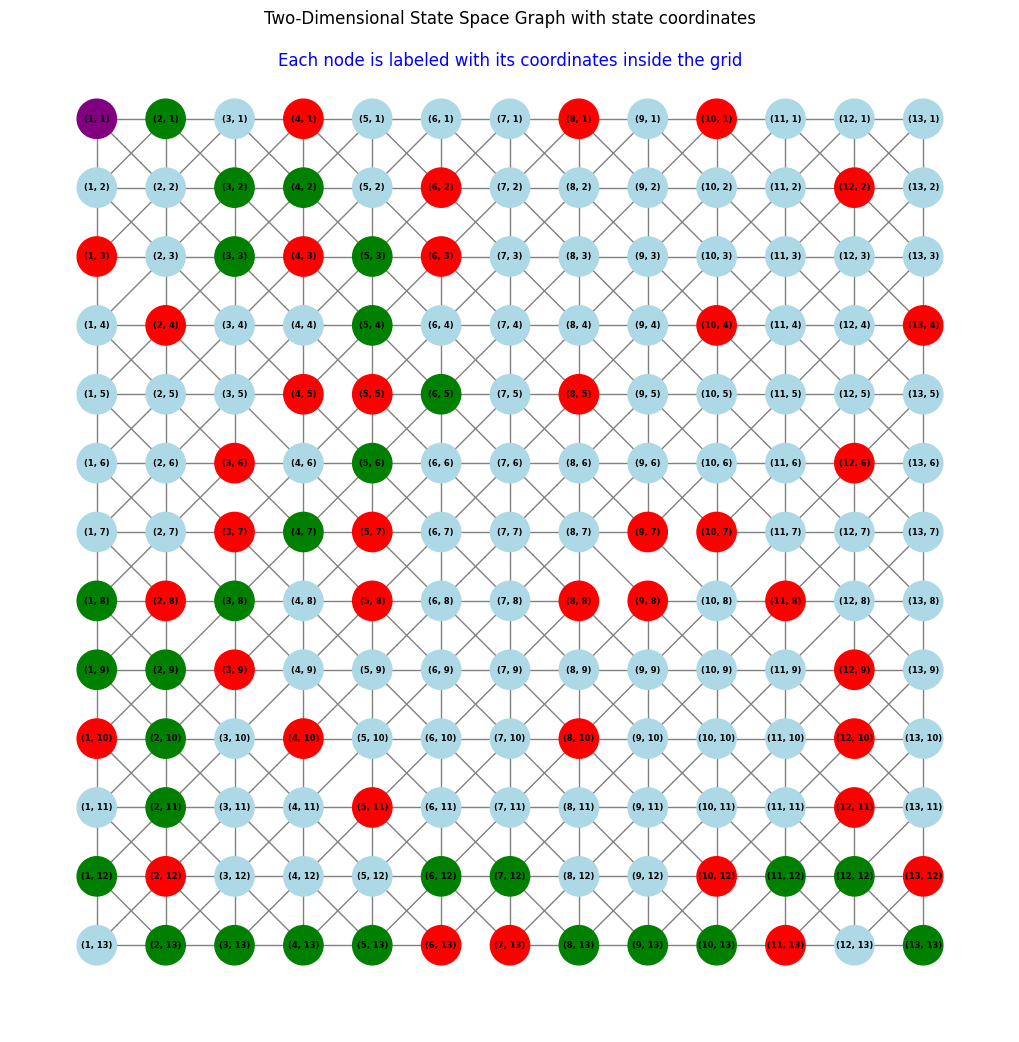

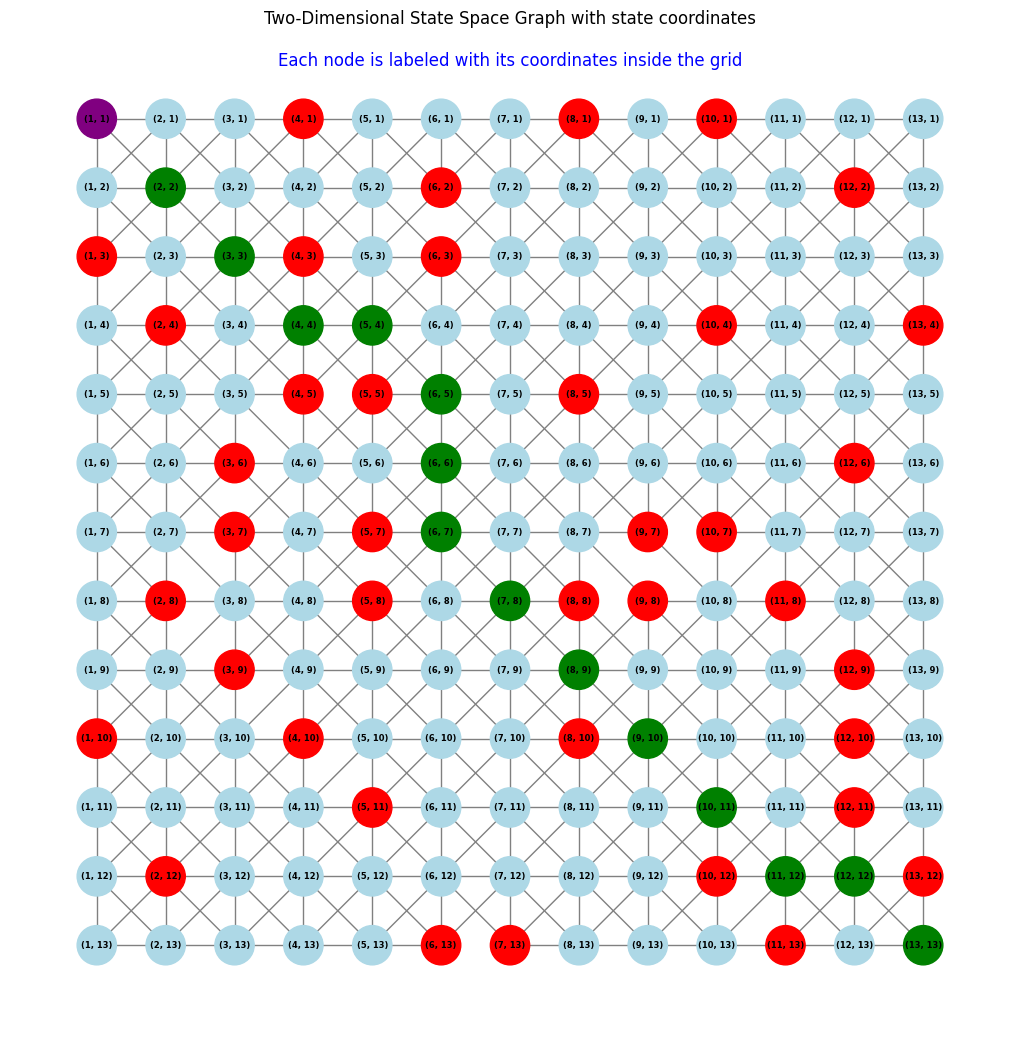

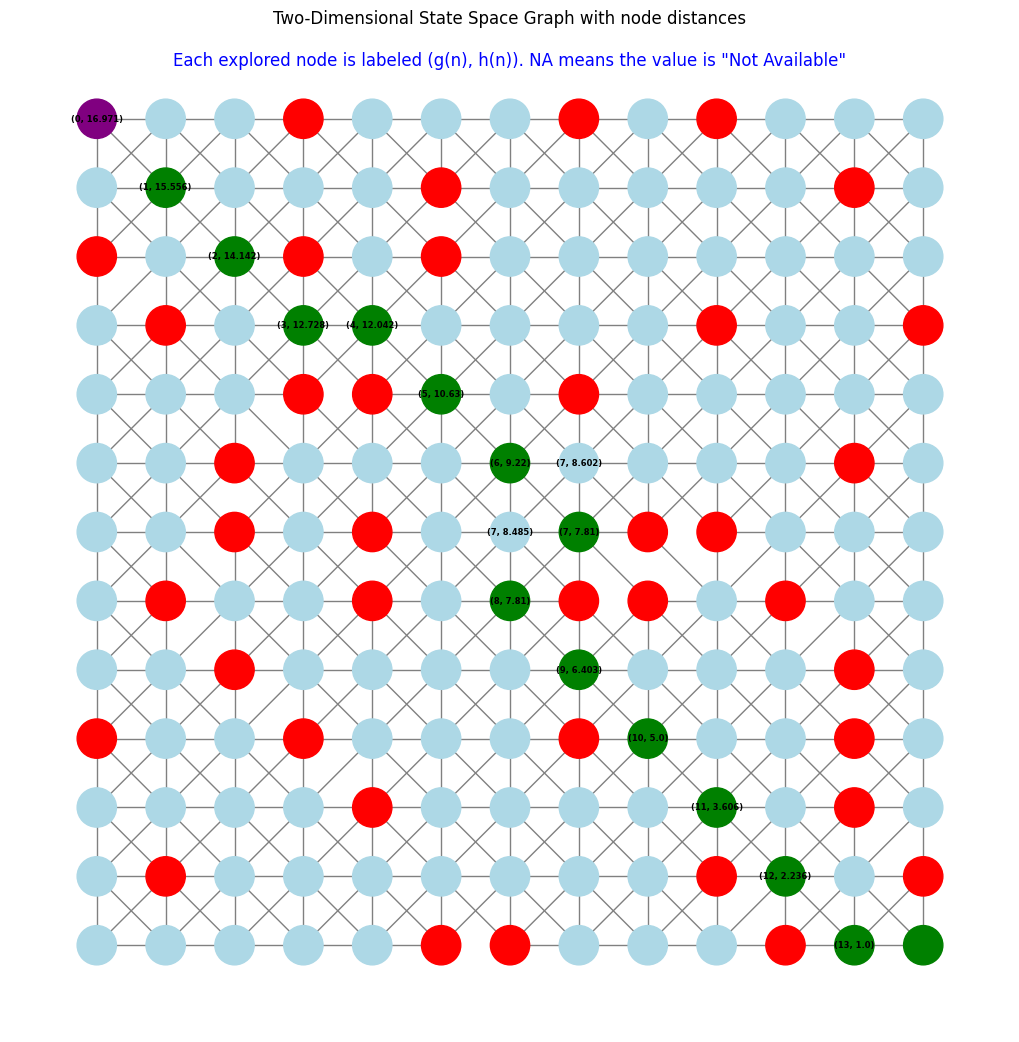

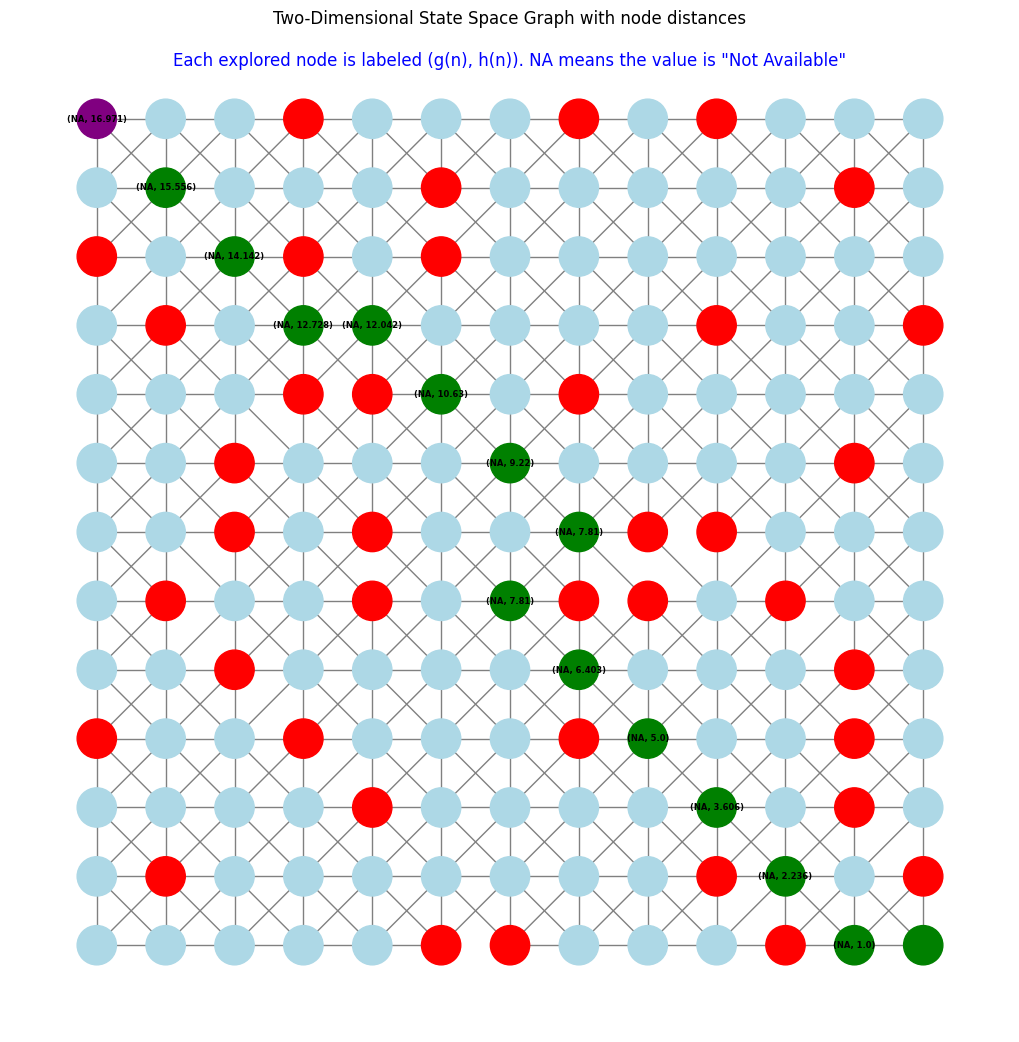

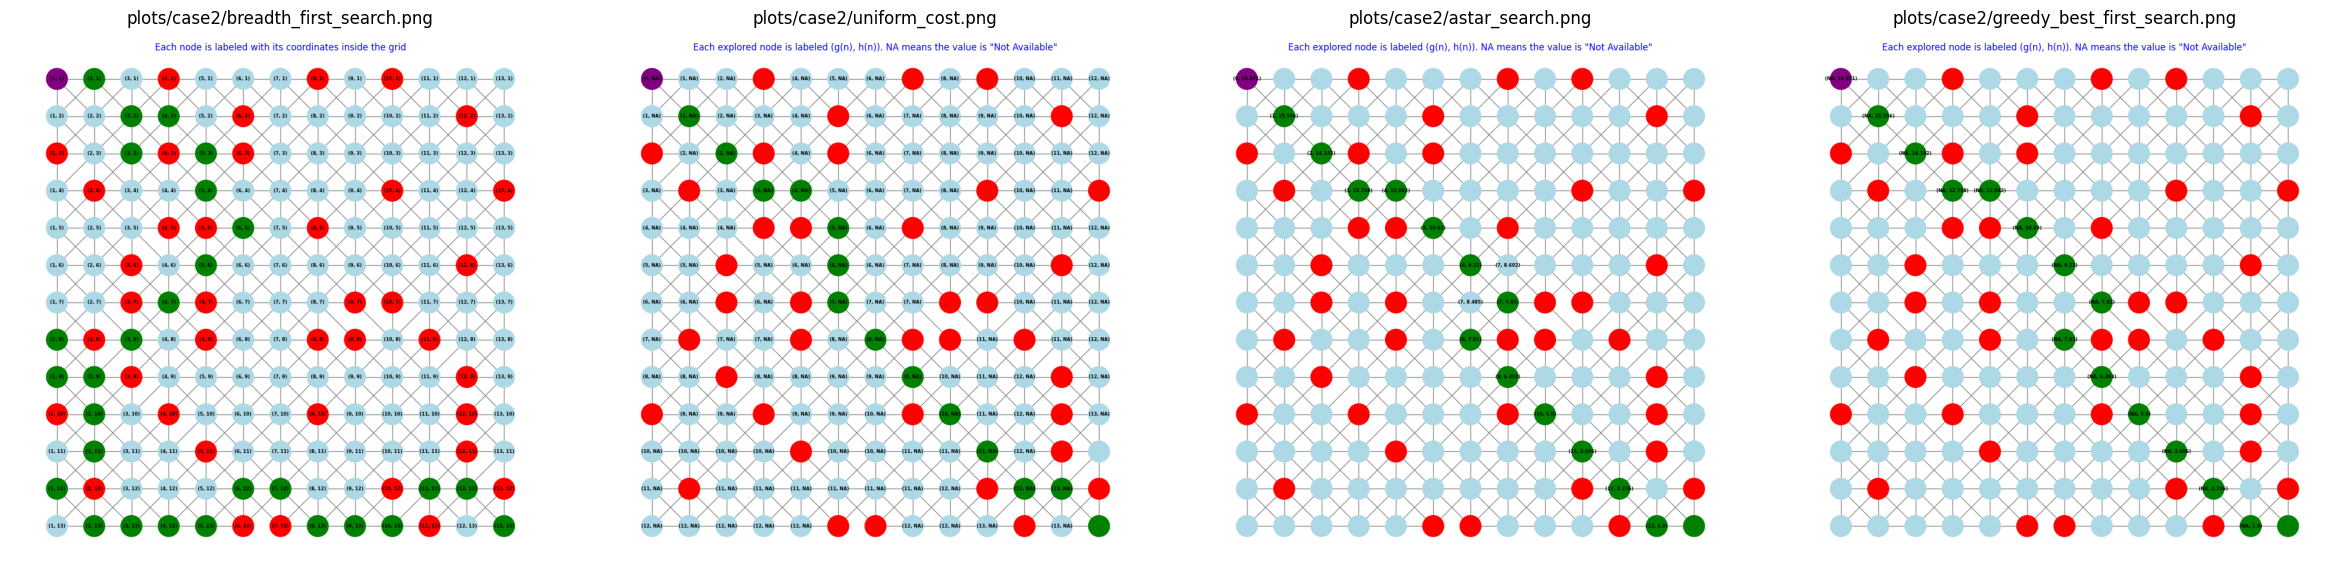

In [ ]:
%matplotlib inline
plot_paths_level2 = ['plots/case2/breadth_first_search.png',
                    'plots/case2/uniform_cost.png',
                    'plots/case2/astar_search.png',
                    'plots/case2/greedy_best_first_search.png']

display_saved_plots(plot_paths_level2)

## <u> LEVEL 3 </u>


In [7]:
# Creating the environment
env_lv3 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv3,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv3.seed(42)
obs_lv3 = env_lv3.reset() #each reset generates a new environment instance
env_lv3.render()

# Game map
game_map_lv3 = process_matrix(obs_lv3['chars'])
game_map_lv3_colors = process_matrix(obs_lv3['colors'])


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}........}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

In [8]:
grid_problem_lvl3 = generate_grid_problem(obs_lv3)
uninformed_agent_lvl3 = UninformedSearchAgent(grid_problem_lvl3)

perform_search(3, uninformed_agent_lvl3, breadth_first_search)
perform_search(3, uninformed_agent_lvl3, uniform_cost_search)

informed_agent_lvl3 = InformedSearchAgent(grid_problem_lvl3)
perform_search(3, informed_agent_lvl3, astar_search, euclidean_distance)
perform_search(3, informed_agent_lvl3, greedy_best_first_search, euclidean_distance)

df_lvl3 = generate_comparison_dataframe(3)
df_lvl3

Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.009990           28         36
Uniform Cost Search (UA)             0.018992           14         14
A* (IA)                              0.001688           14         14
Greedy Best First Search (IA)        0.000879           14         18

### General Problem

In [30]:
"""
# Instantiate a problem from class GridWorldProblem
grid_problem3 = GridWorldProblem(game_map_lv3, find_state_coord(game_map_lv3, ord('@')), find_state_coord(game_map_lv3, ord('>')), game_map_lv3_colors)

print("Initial state:", grid_problem3.initial_state)
print("Goal state:", grid_problem3.goal_state)

basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)

plot_graph(basic_graph, "plots/case3/case3.png")
"""

Initial state: (1, 1)
Goal state: (13, 13)


## Uninformed Agent 

In [31]:
"""
# Instantiate an Uninformed Search Agent for level 3
uninformed_agent = UninformedSearchAgent(grid_problem3)
"""

### Breadth-First Search

In [32]:
"""
# Perform uniformed search with the Breadth-First Search
solution_path = uninformed_agent.search(breadth_first_search)

# Record the results
time_level3.append(uninformed_agent.execution_time())
path_level3.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_level3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph
plot_graph(explored_graph, "plots/case3/breadth_first_search.png")
"""

Time: 0.015664 seconds
The found path is long 28.
The cost of the taken path is 36.


### Uninform Cost Search

In [33]:
"""
# Use the Uniform Cost Search
solution_path, node_distances = uninformed_agent.search(uniform_cost_search)

# Record the results
time_level3.append(uninformed_agent.execution_time())
path_level3.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The taken path has the length {len(solution_path)} (steps).')

# Cost path computation
path_cost_level3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph
plot_graph_distances(explored_graph, node_distances, "plots/case3/uniform_cost.png")
"""

Time: 0.026018 seconds
The taken path has the length 14 (steps).
The cost of the taken path is 14.


## Informed Agent

In [34]:
"""
# Instantiate an Informed Search Agent
informed_agent = InformedSearchAgent(grid_problem3)
"""

###  A*

In [35]:
"""
# Use A* 
solution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)

# Record the results
time_level3.append(informed_agent.execution_time())
path_level3.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph 
plot_graph_distances(explored_graph, node_distances, "plots/case3/astar_search.png")
"""

Time: 0.004149 seconds
The found path is long 14
The cost of the taken path is 14.


### Greedy Best-First-Search

In [36]:
"""
# Use Greedy Best First Search
informed_agent = InformedSearchAgent(grid_problem3)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)

# Record the results
time_level3.append(informed_agent.execution_time())
path_level3.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_level3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph 
plot_graph_distances(explored_graph, node_distances, "plots/case3/greedy_best_first_search.png")
"""

Time: 0.001135 seconds
The found path is long 14
The cost of the taken path is 18.


In [37]:
"""
comparison_level3.append(algorithms)
comparison_level3.append(time_level3)
comparison_level3.append(path_level3)
comparison_level3.append(path_cost_level3)
df_level3 = pd.DataFrame()
df_level3['Algorithm'] = algorithms
df_level3['Execution Time'] = time_level3
df_level3['Path Length'] = path_level3
df_level3['Path Cost'] = path_cost_level3
df_level3.set_index('Algorithm', inplace=True)
df_level3
"""

Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.015664           28         36
Uniform Cost Search (UA)             0.026018           14         14
A* (IA)                              0.004149           14         14
Greedy Best First Search (IA)        0.001135           14         18

In [38]:
#Image(filename='plots/case3/case3.png', width=500, height=500)

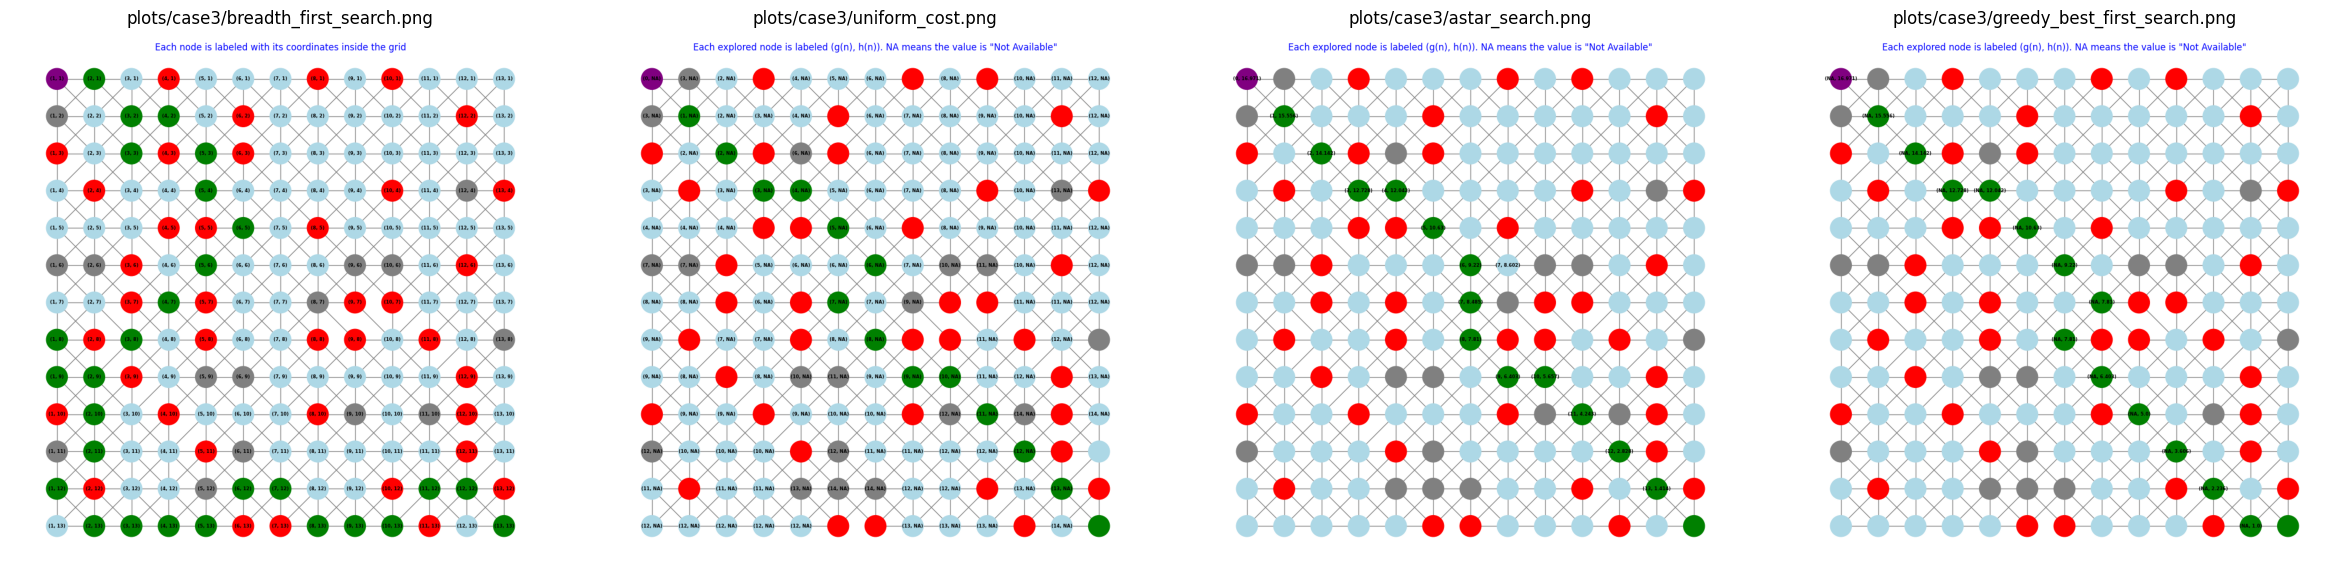

In [69]:
%matplotlib inline
plot_paths_level3 = ['plots/case3/breadth_first_search.png',
                    'plots/case3/uniform_cost.png',
                    'plots/case3/astar_search.png',
                    'plots/case3/greedy_best_first_search.png']

display_saved_plots(plot_paths_level3)

## Summary of the three levels
... results in static environment

In [40]:
print("Level 1:")
print(df_level1)
print("\nLevel 2:")
print(df_level2)
print("\nLevel 3:")
print(df_level3)

Level 1:
                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.014956           29         29
Uniform Cost Search (UA)             0.041290           13         13
A* (IA)                              0.004884           13         13
Greedy Best First Search (IA)        0.001051           13         13

Level 2:
                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.027235           28         28
Uniform Cost Search (UA)             0.029479           14         14
A* (IA)                              0.004957           14         14
Greedy Best First Search (IA)        0.002583           14         14

Level 3:
                               Execution Time  Path Length  Path Cost
Algorithm                                                    

In [41]:
# %matplotlib inline
# print(df_case1)
# display_saved_plots(plot_paths_case1)
# print(df_case2)
# display_saved_plots(plot_paths_case2)
# print(df_case3)
# display_saved_plots(plot_paths_case3)

In [42]:
plt.ion() #??????????????

# Tackling Dynamic Environments with Online Search

In Levels 4 and 5, our project takes a new direction, aiming to heighten the complexity of the search process by introducing hostile monsters. At this point, departing from uninformed search methodologies becomes imperative. Instead of rewriting conventional algorithms, our focus shifted towards the development of: 

1. a **customized online algorithm**

and

2. a **new heuristic** designed to assert control over the evolving dynamic environment.

## The Monsters

To introduce monsters into the environment, we meticulously selected creatures with speeds equal to or less than the agent's speed, as documented on Nethack Wiki as **12**. In order to test our algorithm and adhere to the comparative approach, we chose two distinct monsters for evaluation. Providing some context, the "base" experience value corresponds to the monster's level, indicating the number of experience points the hero earns for defeating it. Consequently, despite the rat being faster, its lower experience level reduces the likelihood of it defeating the agent. Conversely, the Beetle, although slower, boasts a higher experience level, rendering it a more formidable adversary overall and increasing the difficulty for the agent.

**Sewer Rat**

| Difficulty | 1 |
| --- | --- |
| Attacks | Bite 1d3 |
| Level | 0 |
| Experience points | 1 |
| Speed | 12 |

**Giant Beetle**
| Difficulty | 6 |
| --- | --- |
| Attacks | Bite 3d6 |
| Level | 5 |
| Experience points | 56 |
| Speed | 6 |

## Online Mode

Conventional online search algorithms, while effective, face limitations in scenarios with entities exhibiting diverse behaviors. Our approach addresses this constraint by devising an algorithm tailored for online search, incorporating variables such as:

- *Monster*
- *Algorithm (A\* or Greedy)*
- *Distance function*

Given the experimental nature of our work, we explored not only *euclidean distance* but also *diagonal distance*, hypothesizing its suitability for our grid-based map.

Reiterating the distinction between the two:

- **Euclidean distance** measures the straight-line or "as-the-crow-flies" distance between two points.
- **Diagonal distance** considers the maximum difference along the x or y axis, permitting movement in both horizontal and vertical directions without directional constraints.

## Our Heuristic

The primary innovation lies in the dynamic nature of the heuristic, enabling the configuration of parameters based on the unique attributes and behaviors of monsters in the environment to address distinct problems effectively. This customization empowers the algorithm to make informed decisions, strategically navigating challenges posed by various adversaries.

The heuristic takes into account the **distance between the agent and the monster**, calculating the cost of actions based on this distance. If the obstacle is sufficiently distant, the agent disregards its presence and aims directly for the goal. Otherwise, the algorithm assigns double weight to the distance to the goal compared to the distance from the monster. The reason behind this approach is to **prioritize the agent's efficient reaching of the goal with minimal steps**, rather than emphasizing escaping the monster. With this configuration, the agent tends to prioritize escape actions only in extremely hazardous situations.

## <u> LEVEL 4 </u>: we added a hostile monster!
change the env into a dynamic one and using 2 different types of monsters,
explaining the monsters, 
use 2 different heuristic,
create 2 online search algorithms (A* and Greedy) 

### <u> LEVEL 4.1 </u>: Rat


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}..r.....}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

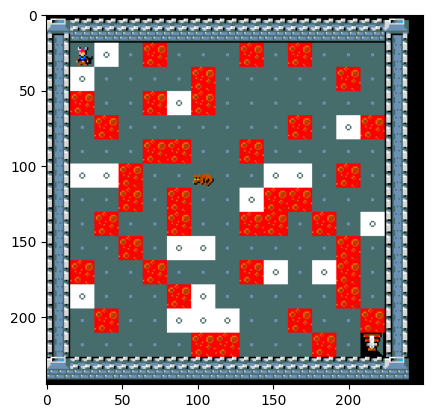

In [43]:
# Create the environment
env_lv4_1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv4_1,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance
env_lv4_1.render()

plt.imshow(obs_lv4_1['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

### General Problem

In [44]:
# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

print("Initial state:", grid_problem4_1.initial_state)
print("Goal state:", grid_problem4_1.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem4_1, grid_problem4_1.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


## Informed Agents for Online Search 
### Online A* - Euclidean Distance

In [45]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'astar', 'euclidean')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 17, Path cost: 17


### Online A* - Diagonal Distance

In [46]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

In [47]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'astar', 'diagonal')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 25, Path cost: 25


### Online Greedy Best-First Search - Euclidean Distance

In [48]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

In [49]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'greedy', 'euclidean')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 17, Path cost: 19


### Online Greedy Best-First Search - Diagonal Distance

In [50]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

In [51]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'greedy', 'diagonal')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 24, Path cost: 26


### <u> CASE 4.2 </u>: The monster is a Giant Beetle!
#### 


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}..a.....}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

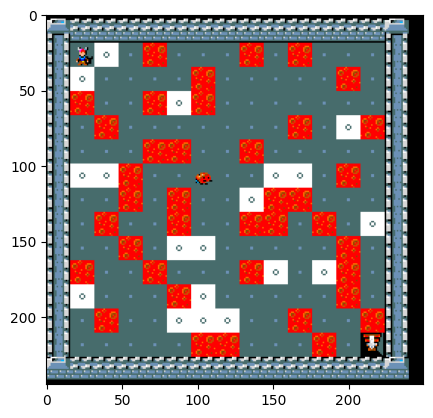

In [52]:
env_lv4_2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv4_2,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance
env_lv4_2.render()

plt.imshow(obs_lv4_2['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

In [53]:
# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

print("Initial state:", grid_problem4_2.initial_state)
print("Goal state:", grid_problem4_2.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem4_2, grid_problem4_2.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


## Informed Agents for Online Search 
### Online A* - Euclidean Distance

In [54]:
### Informed Agent for Online Search (online A*)
onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'astar', 'euclidean')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 17, Path cost: 17


###  Online A* - Diagonal Distance

In [55]:
# Online Search 
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

In [56]:
### Informed Agent for Online Search (online A*)
onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'astar', 'diagonal')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 20, Path cost: 22


### Online Greedy Best-First Search - Euclidean Distance

In [57]:
# Online Search 
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

In [58]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'greedy', 'euclidean')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 17, Path cost: 19


### Online Greedy Best-First Search - Diagonal Distance

In [59]:
# Online Search with Greedy Algorithm
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

In [60]:
onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'greedy', 'diagonal')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 17, Path cost: 19


## <u> CASE 5 </u>
### Create the Environment 4.1.: we added a dead end.

### <u> CASE 5.1 </u>: Rat - A* - Euclidean Distance




Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}..}..|                                                                 
|..}..r...}.}.|                                                                 
|..}.}...}}.}.|                                                                 
|.}..}..}}.}}.|            

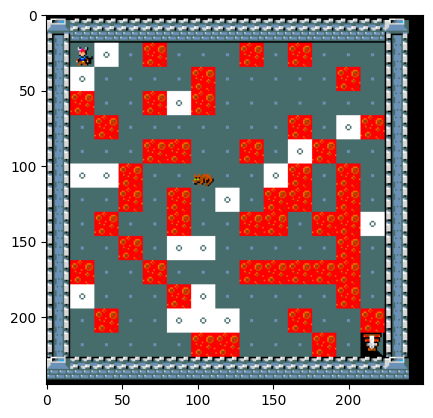

In [61]:
env_lv5_1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv5_1,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel"),
)

env_lv5_1.seed(42)
obs_lv5_1 = env_lv5_1.reset() #each reset generates a new environment instance
env_lv5_1.render()

plt.imshow(obs_lv5_1['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv5_1 = process_matrix(obs_lv5_1['chars'])
game_map_lv5_1_colors = process_matrix(obs_lv5_1['colors'])
game_lv5_1 = obs_lv5_1['pixel']

In [62]:
# Instantiate a problem from class GridWorldProblem
grid_problem5_1 = GridWorldProblem(game_map_lv5_1, find_state_coord(game_map_lv5_1, ord('@')), find_state_coord(game_map_lv5_1, ord('>')), game_map_lv5_1_colors)

print("Initial state:", grid_problem5_1.initial_state)
print("Goal state:", grid_problem5_1.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem5_1, grid_problem5_1.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


In [63]:
onlineSearchAgent = OnlineSearchAgent(grid_problem5_1)

image = plt.imshow(game_lv5_1[25:300, :250])
agent = find_state_coord(grid_problem5_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem5_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'astar', 'euclidean')

    grid, _, _, _ = env_lv5_1.step(action) # Agent takes next step
    new_game_map_lv5_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem5_1.update_grid(new_game_map_lv5_1) # Update grid
    agent = find_state_coord(grid_problem5_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem5_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv5_1, game_map_lv5_1_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 20, Path cost: 20


### <u> CASE 5.2 </u>: Beetle - A* - Euclidean Distance


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}..}..|                                                                 
|..}..a...}.}.|                                                                 
|..}.}...}}.}.|                                                                 
|.}..}..}}.}}.|            

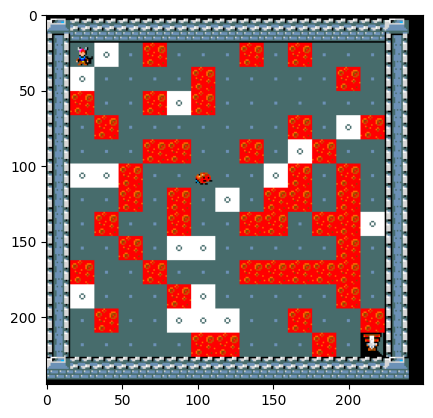

In [64]:
env_lv5_2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv5_2,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel"),
)

env_lv5_2.seed(42)
obs_lv5_2 = env_lv5_2.reset() #each reset generates a new environment instance
env_lv5_2.render()

plt.imshow(obs_lv5_2['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv5_2 = process_matrix(obs_lv5_2['chars'])
game_map_lv5_2_colors = process_matrix(obs_lv5_2['colors'])
game_lv5_2 = obs_lv5_2['pixel']

In [65]:
# Instantiate a problem from class GridWorldProblem
grid_problem5_2 = GridWorldProblem(game_map_lv5_2, find_state_coord(game_map_lv5_2, ord('@')), find_state_coord(game_map_lv5_2, ord('>')), game_map_lv5_2_colors)

print("Initial state:", grid_problem5_2.initial_state)
print("Goal state:", grid_problem5_2.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem5_2, grid_problem5_2.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


In [66]:
### Informed Agent for Online Search (online A*)
onlineSearchAgent = OnlineSearchAgent(grid_problem5_2)

image = plt.imshow(game_lv5_2[25:300, :250])
agent = find_state_coord(grid_problem5_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem5_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'astar', 'euclidean')

    grid, _, _, _ = env_lv5_2.step(action) # Agent takes next step
    new_game_map_lv5_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem5_2.update_grid(new_game_map_lv5_2) # Update grid
    agent = find_state_coord(grid_problem5_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem5_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv5_2, game_map_lv5_2_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 29, Path cost: 29


# Final Considerations

Upon analyzing the performance of our algorithm, we identified several factors contributing to its success, while also acknowledging areas open to improvement. Interestingly, we observed that the diagonal distance, despite its theoretical advantages, exhibited less favorable outcomes in our specific context. Several reasons may account for this discrepancy. First, the diagonal distance might have overemphasized certain paths, leading to suboptimal choices in complex terrains. Additionally, the diagonal distance may not align optimally with the distribution of obstacles and monsters in our environment, impacting the algorithm's decision-making. Despite these observations, the overall results confirm the algorithm's efficacy. As we strive for continuous enhancement, addressing these nuances provides a promising avenue for refining our approach further.

### Teamwork

In conclusion, our project has been a remarkable journey exemplifying the enriching dynamics of working in a strongly international and multidisciplinary team. 

With two Erasmus students majoring in Business Informatics and two with a background in Digital Humanities, we truly embraced the challenge of stepping out of our comfort zones with great dedication. Working together was indeed a challenge, yet it proved to be a rewarding experience as we collaboratively navigated our project with authentic enthusiasm and a shared commitment to delivering our best. 

All in all, this journey not only expanded our perspectives at an academic level but also fostered a wonderful friendship among us. So, in the end, we sincerely hope that, beside all, our efforts effectively conveyed the message that sometimes challenges can take interesting turns in life, and that you never know what unexpected opportunities may arise from embracing diversity.

### Bibliography

- Russell, S., & Norvig, P. (2010). *Artificial Intelligence: A Modern Approach* (3rd ed.). Pearson.
- NetHack Wiki. "Monster." NetHack Wiki, https://nethackwiki.com/wiki/Monster.